In [1]:
library(rpart)
library(rpart.plot)

Warning message:
"package 'rpart' was built under R version 3.6.3"

In [2]:
golf = read.csv("playgolf.csv")

In [3]:
head(golf)

Outlook,Temp,Humidity,Windy,Play.Golf
Rainy,Hot,High,False,No
Rainy,Hot,High,True,No
Overcast,Hot,High,False,Yes
Sunny,Mild,High,False,Yes
Sunny,Cool,Normal,False,Yes
Sunny,Cool,Normal,True,No


In [4]:
nwgolf <- data.frame(as.numeric(golf$Outlook), as.numeric(golf$Humidity), as.numeric(golf$Windy), as.numeric(golf$Temp), golf$Play.Golf)
names(nwgolf) <- c("Outlook", "Humidity", "Windy","Temp","PlayOrNot" )

In [5]:
nwgolf

Outlook,Humidity,Windy,Temp,PlayOrNot
2,1,1,2,No
2,1,2,2,No
1,1,1,2,Yes
3,1,1,3,Yes
3,2,1,1,Yes
3,2,2,1,No
1,2,2,1,Yes
2,1,1,3,No
2,2,1,1,Yes
3,2,1,3,Yes


In [6]:
sapply(nwgolf,"class")

Outlook  Humidity     Windy      Temp PlayOrNot 
"numeric" "numeric" "numeric" "numeric"  "factor"

In [7]:
smp_size <- floor(0.8 * nrow(nwgolf))
set.seed(123)
train_ind <- sample(seq_len(nrow(nwgolf)), size = smp_size)

train <- nwgolf[train_ind, ]
test <- nwgolf[-train_ind, ]

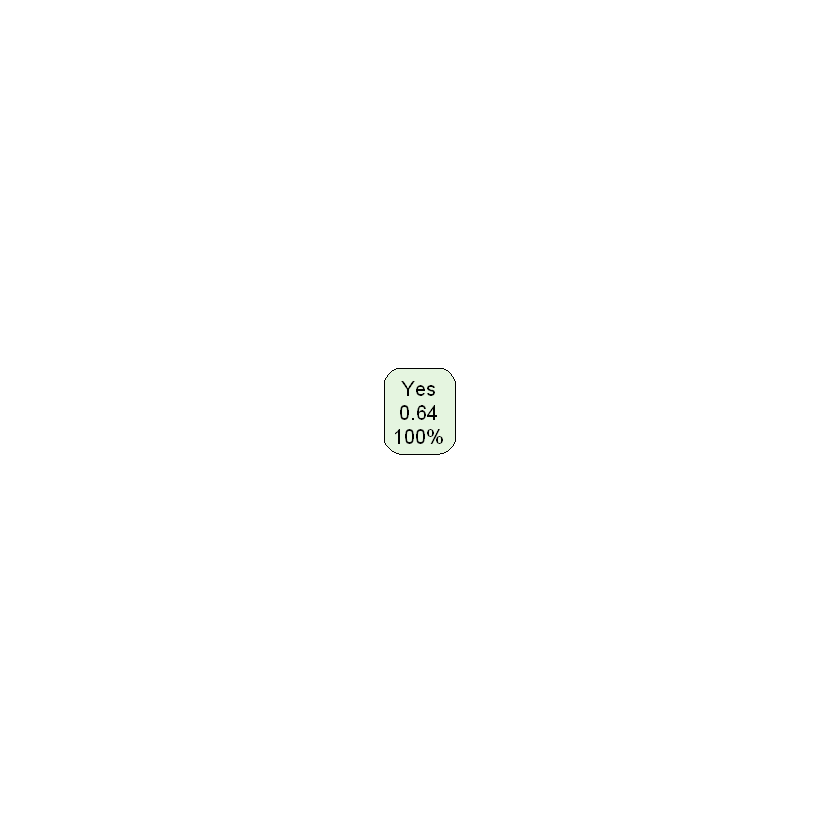

In [8]:
res <- rpart(PlayOrNot~Outlook+Humidity+Windy+Temp, data = train)
rpart.plot(res,type =3, fallen.leaves = F, cex =1)

## Professor's Work

In [9]:
v <- nwgolf$PlayOrNot

table(v)

v
 No Yes 
  5   9 

In [10]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


In [11]:
runif(nrow(nwgolf))

[1] 0.59414202 0.28915974 0.14711365 0.96302423 0.90229905 0.69070528
 [7] 0.79546742 0.02461368 0.47779597 0.75845954 0.21640794 0.31818101
[13] 0.23162579 0.14280002

In [12]:
nwgolf[, 'train'] <- ifelse(runif(nrow(nwgolf)) < 0.75, 1, 0)

trainSet <- nwgolf[nwgolf$train == 1,]
testSet <- nwgolf[nwgolf$train == 0, ]



trainColNum <- grep('train', names(trainSet))

trainColNum



trainSet <- trainSet[, -trainColNum]
testSet <- testSet[, -trainColNum]


treeFit <- rpart(PlayOrNot~.,data=trainSet,method = 'class')
print(treeFit)

[1] 6

n= 12 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 12 5 Yes (0.4166667 0.5833333) *


In [13]:
rattle::fancyRpartPlot(treeFit, type = 1, sub = "")

ERROR: Error in apply(model$frame$yval2[, yval2per], 1, function(x) x[1 + x[1]]): dim(X) must have a positive length


In [14]:
Prediction1 <- predict(treeFit,newdata=testSet[-5],type = 'class')
confusionMatrix(Prediction1,testSet$PlayOrNot)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No   0   0
       Yes  0   2
                                     
               Accuracy : 1          
                 95% CI : (0.1581, 1)
    No Information Rate : 1          
    P-Value [Acc > NIR] : 1          
                                     
                  Kappa : NaN        
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : NA         
            Specificity :  1         
         Pos Pred Value : NA         
         Neg Pred Value : NA         
             Prevalence :  0         
         Detection Rate :  0         
   Detection Prevalence :  0         
      Balanced Accuracy : NA         
                                     
       'Positive' Class : No         
                                     

In [15]:
printcp(treeFit)


Classification tree:
rpart(formula = PlayOrNot ~ ., data = trainSet, method = "class")

Variables actually used in tree construction:
character(0)

Root node error: 5/12 = 0.41667

n= 12 

    CP nsplit rel error xerror xstd
1 0.01      0         1      0    0


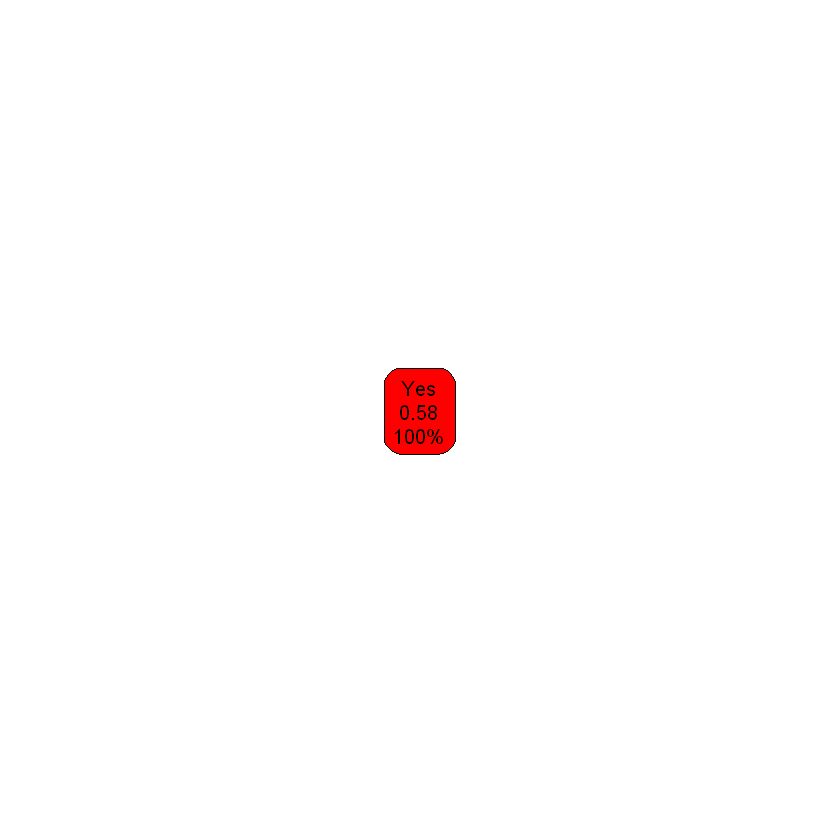

In [16]:
opt  <-  which.min(treeFit$cptable[,'xerror'])

cp <-  treeFit$cptable[opt, 'CP']
pruned_model <-  prune(treeFit,cp)
rpart.plot(pruned_model, box.col=c("red", "green"))

In [17]:
rpart_pruned_predict <- predict(pruned_model, newdata=testSet[-5],type = 'class')
mn2 <- mean(rpart_pruned_predict==testSet$PlayOrNot)
mn2

[1] 1